# PRUEBAS A/B ADICIONALES

In [12]:
# importamos las librerías que necesitamos

# Tratamiento de datos
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

import scipy.stats as stats
import scipy.stats as st
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
# pd.set_option('display.max_rows', None) # para poder visualizar todas las filas de los DataFrames

In [13]:
#Abrimos el csv y lo convertimos a un DataFrame.
df_HR = pd.read_csv('df_HR_limpio.csv', index_col= 0)
df_HR.head()

,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,DateBirth,RemoteWork
Age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
51,No,Unknown,684.0,6,3,Unknown,"162,0",1,M,51.0,3,5,Research Director,3,Unknown,19537.0,6462,7,No,13,"3,0",3,0,Unknown,5,3,20,15,15,1972,Yes
52,No,Unknown,699.0,1,4,Life Sciences,"259,0",3,M,65.0,2,5,Manager,3,Unknown,19999.0,5678,0,Unknown,14,"3,0",1,1,"34,0",5,3,33,11,9,1971,1
42,No,travel_rarely,532.0,4,2,Technical Degree,"319,0",3,M,58.0,3,5,Manager,4,Married,19232.0,4933,1,No,11,"3,0",4,0,"22,0",3,3,22,11,15,1981,1
47,No,travel_rarely,359.0,2,4,Medical,Unknown,1,F,82.0,3,4,Research Director,3,Married,17169.0,26703,3,Unknown,19,"3,0",2,2,Unknown,2,3,20,5,6,1976,False
48,No,Unknown,117.0,22,3,Medical,"1900,0",4,F,58.0,3,4,Manager,4,Unknown,17174.0,2437,3,No,11,"3,0",2,1,Unknown,3,3,22,4,7,1975,Yes


## A/B TESTING - RELATIONSHIP SATISFACTION

### Observaciones: La satisfacción con las relaciones interpersonales no parece influir en la rotación de los empleados.

In [14]:
df_AB_RS = pd.read_csv('df_HR_limpio.csv', index_col= None)
df_AB_RS.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,DateBirth,RemoteWork
0,51,No,Unknown,684.0,6,3,Unknown,"162,0",1,M,51.0,3,5,Research Director,3,Unknown,19537.0,6462,7,No,13,"3,0",3,0,Unknown,5,3,20,15,15,1972,Yes
1,52,No,Unknown,699.0,1,4,Life Sciences,"259,0",3,M,65.0,2,5,Manager,3,Unknown,19999.0,5678,0,Unknown,14,"3,0",1,1,"34,0",5,3,33,11,9,1971,1
2,42,No,travel_rarely,532.0,4,2,Technical Degree,"319,0",3,M,58.0,3,5,Manager,4,Married,19232.0,4933,1,No,11,"3,0",4,0,"22,0",3,3,22,11,15,1981,1
3,47,No,travel_rarely,359.0,2,4,Medical,Unknown,1,F,82.0,3,4,Research Director,3,Married,17169.0,26703,3,Unknown,19,"3,0",2,2,Unknown,2,3,20,5,6,1976,False
4,48,No,Unknown,117.0,22,3,Medical,"1900,0",4,F,58.0,3,4,Manager,4,Unknown,17174.0,2437,3,No,11,"3,0",2,1,Unknown,3,3,22,4,7,1975,Yes


Creamos dos grupos:

Grupo A (Control): Empleados con un nivel de satisfacción con las relaciones interpersonales igual o superior a 3 en una escala de 1 a 5.

Grupo B (Variante): Empleados con un nivel de satisfacción con las relaciones interpersonales inferior a 3 en la misma escala.

In [15]:
#Buscamos en la columna 'RelationshipSatisfaction' los valores únicos para encontrar a los miembros de cada grupo de control.
df_AB_RS['RelationshipSatisfaction'].value_counts()

RelationshipSatisfaction
3    343
4    331
2    214
1    192
Name: count, dtype: int64

In [16]:
#Creamos una nueva columna llamada Group en la que agrupamos a los empleados en función de sus niveles de satisfacción con las relaciones interpersonales.
df_AB_RS['Group'] = np.where(df_AB_RS['RelationshipSatisfaction'] >= 3, 'A', 'B')
df_AB_RS['Group'].value_counts()

Group
A    674
B    406
Name: count, dtype: int64

In [17]:
#Dividimos a los empleados de los grupos A y B en función de si han dejado la empresa o no.
attrition_A_RS = df_AB_RS[df_AB_RS['Group'] == 'A']['Attrition']
attrition_B_RS = df_AB_RS[df_AB_RS['Group'] == 'B']['Attrition']

In [18]:
#Para ver la relación entre estas variables categóricas, creamos una tabla de contingencia.
tabla_contingencia2 = pd.crosstab(df_AB_RS['Group'], df_AB_RS['Attrition'])
tabla_contingencia2

Attrition,No,Yes
Group,,
A,567,107
B,336,70


In [19]:
#Como los datos numéricos no nos dan toda la información que necesitamos o no de la manera más evidente, calculamos los porcentajes.
tabla_contingencia_AB_RS = pd.crosstab(df_AB_RS['Group'], df_AB_RS['Attrition'], normalize='index') * 100
tabla_contingencia_AB_RS.round(2)

Attrition,No,Yes
Group,,
A,84.12,15.88
B,82.76,17.24


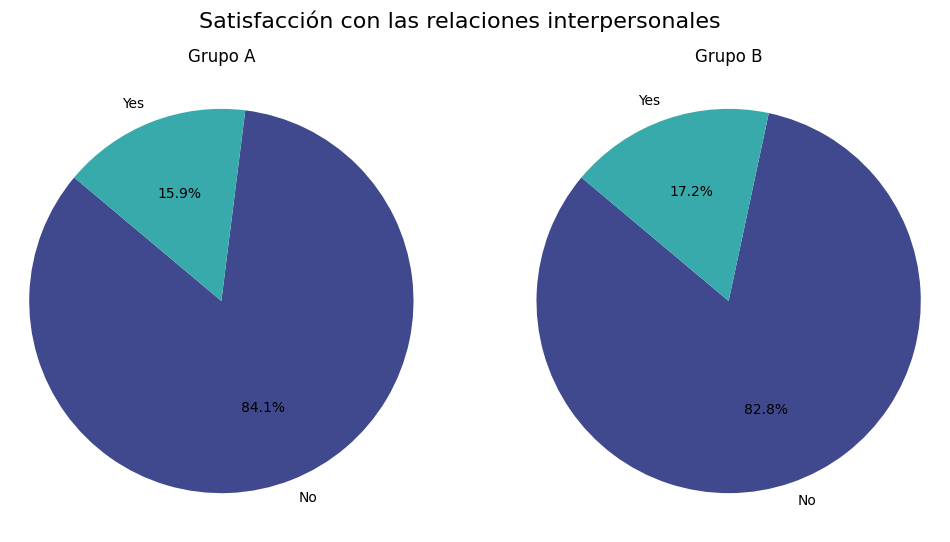

In [20]:
# Datos para los gráficos de quesitos
etiquetas = tabla_contingencia_AB_RS.columns.tolist()

# Obtener los colores de la paleta "mako"
colores_mako = sns.color_palette("mako", len(etiquetas))

# Crear los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico del grupo A
tamaños_A = tabla_contingencia_AB_RS.loc['A']
ax1.pie(tamaños_A, labels=etiquetas, autopct='%1.1f%%', startangle=140, colors=colores_mako)
ax1.axis('equal')  # Para que el gráfico sea un círculo
ax1.set_title('Grupo A')

# Gráfico del grupo B
tamaños_B = tabla_contingencia_AB_RS.loc['B']
ax2.pie(tamaños_B, labels=etiquetas, autopct='%1.1f%%', startangle=140, colors=colores_mako)
ax2.axis('equal')  # Para que el gráfico sea un círculo
ax2.set_title('Grupo B')

# Título principal del gráfico
fig.suptitle('Satisfacción con las relaciones interpersonales', fontsize=16)

# Mostrar los gráficos
plt.show()


**Observaciones:**
Observamos que en el grupo A, donde los empleados tienen unos niveles de satisfacción altos, la tasa de rotación es del 15.9%, mientras que en el grupo B, la tasa de rotación es del 17.2%, lo que significa que el porcentaje de empleados que se han ido en el grupo A es menor al del grupo B, donde los niveles de satisfacción son más bajos.

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

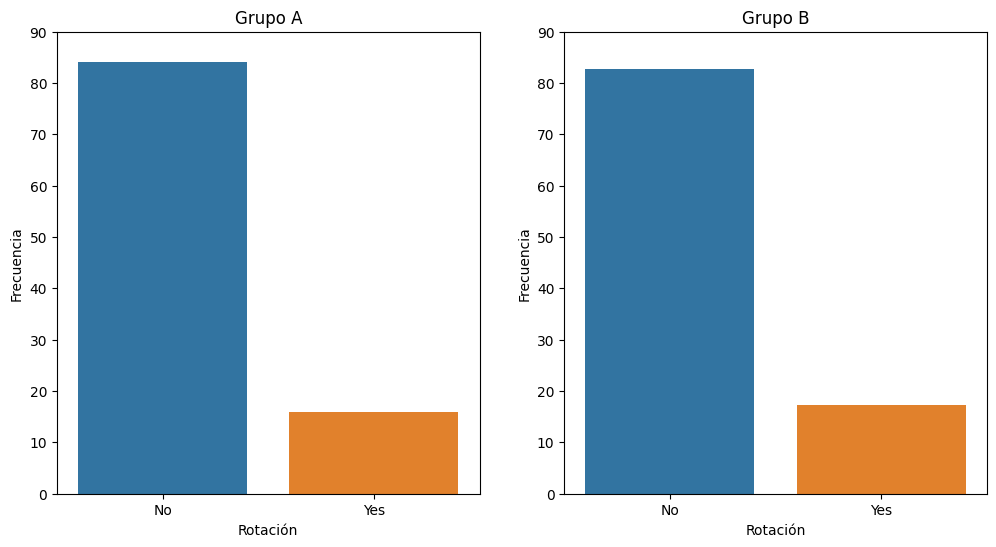

In [21]:
#Visualizamos los datos de las variables de la tabla de contingencia.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

#Gráfico de barras para grupo A.
sns.barplot(x=tabla_contingencia_AB_RS.columns, y=tabla_contingencia_AB_RS.loc['A'], ax=axes[0])
axes[0].set_title('Grupo A')
axes[0].set_xlabel('Rotación')
axes[0].set_ylabel('Frecuencia')
axes[0].set_ylim(0, 90);

#Gráfico de barras para grupo B.
sns.barplot(x=tabla_contingencia_AB_RS.columns, y=tabla_contingencia_AB_RS.loc['B'], ax=axes[1])
axes[1].set_title('Grupo B')
axes[1].set_xlabel('Rotación')
axes[1].set_ylabel('Frecuencia')
axes[1].set_ylim(0, 90);

In [22]:
#Antes de realizar la prueba, comprobamos si la distribución de los datos es normal o no.
df_AB_RS['rotacion_grupo_A'] = ((df_AB_RS['Group'] == 'A') & (df_AB_RS['Attrition'] == 'Yes')).astype(int)
df_AB_RS['rotacion_grupo_B'] = ((df_AB_RS['Group'] == 'B') & (df_AB_RS['Attrition'] == 'Yes')).astype(int)

#Hacemos el de Shapiro-Wilk para comprobar la normalidad.
statistic, p_value_a = stats.shapiro(df_AB_RS['rotacion_grupo_A'])
if p_value_a > 0.05:
    print(f"Para la columna 'rotacion_grupo_A', los datos siguen una distribución normal, p-value: {p_value_a:.5f}")
else:
    print(f"Para la columna 'rotacion_grupo_A', los datos no siguen una distribución normal, p-value: {p_value_a:.5f}")

print('...................................................................')

statistic, p_value_b = stats.shapiro(df_AB_RS['rotacion_grupo_B'])
if p_value_b > 0.05:
    print(f"Para la columna 'rotacion_grupo_B', los datos siguen una distribución normal, p-value: {p_value_b:.5f}")
else:
    print(f"Para la columna 'rotacion_grupo_B', los datos no siguen una distribución normal, p-value: {p_value_b:.5f}")

Para la columna 'rotacion_grupo_A', los datos no siguen una distribución normal, p-value: 0.00000
...................................................................
Para la columna 'rotacion_grupo_B', los datos no siguen una distribución normal, p-value: 0.00000


In [23]:
# Como las distribuciones no son normales, realizamos el test de Mann Whitney.

#Usamos los datos filtrados.
rotacion_grupo_A = df_AB_RS.loc[df_AB_RS['Group'] == 'A', 'rotacion_grupo_A']
rotacion_grupo_B = df_AB_RS.loc[df_AB_RS['Group'] == 'B', 'rotacion_grupo_B']


statistic, p_value = mannwhitneyu(rotacion_grupo_A, rotacion_grupo_B)

print(f'El valor del p_value es de {p_value}')
print('......................................')

#Alfa
alfa=0.05
#Comparamos el valor p con el nivel de significancia.
if p_value > alfa:
    print("No podemos rechazar la hipótesis nula.")
    print("No existe una diferencia significativa entre la rotación del grupo A y del grupo B.")
else:
    print("Rechazamos la hipótesis nula.")
    print("Existe una diferencia significativa entre la rotación del grupo A y del grupo B.")

NameError: name 'mannwhitneyu' is not defined

## A/B TESTING - JOB INVOLVEMENT

### Observaciones: Hay una mayor rotación entre los empleados que tienen un menor nivel de implicación en el trabajo.

In [24]:
df_AB_JI = pd.read_csv('df_HR_limpio.csv', index_col= None)
df_AB_JI.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,DateBirth,RemoteWork
0,51,No,Unknown,684.0,6,3,Unknown,"162,0",1,M,51.0,3,5,Research Director,3,Unknown,19537.0,6462,7,No,13,"3,0",3,0,Unknown,5,3,20,15,15,1972,Yes
1,52,No,Unknown,699.0,1,4,Life Sciences,"259,0",3,M,65.0,2,5,Manager,3,Unknown,19999.0,5678,0,Unknown,14,"3,0",1,1,"34,0",5,3,33,11,9,1971,1
2,42,No,travel_rarely,532.0,4,2,Technical Degree,"319,0",3,M,58.0,3,5,Manager,4,Married,19232.0,4933,1,No,11,"3,0",4,0,"22,0",3,3,22,11,15,1981,1
3,47,No,travel_rarely,359.0,2,4,Medical,Unknown,1,F,82.0,3,4,Research Director,3,Married,17169.0,26703,3,Unknown,19,"3,0",2,2,Unknown,2,3,20,5,6,1976,False
4,48,No,Unknown,117.0,22,3,Medical,"1900,0",4,F,58.0,3,4,Manager,4,Unknown,17174.0,2437,3,No,11,"3,0",2,1,Unknown,3,3,22,4,7,1975,Yes


Creamos dos grupos:

Grupo A (Control): Empleados con un nivel de satisfacción con las relaciones interpersonales igual o superior a 3 en una escala de 1 a 4.

Grupo B (Variante): Empleados con un nivel de satisfacción con las relaciones interpersonales inferior a 3 en la misma escala.

In [25]:
#Buscamos en la columna 'JobInvolvement' los valores únicos para encontrar a los miembros de cada grupo de control.
df_AB_JI['JobInvolvement'].value_counts()

JobInvolvement
3    631
2    283
4    100
1     66
Name: count, dtype: int64

In [26]:
#Creamos una nueva columna llamada Group en la que agrupamos a los empleados en función de sus niveles de satisfacción.
df_AB_JI['Group'] = np.where(df_AB_JI['JobInvolvement'] >= 3, 'A', 'B')
df_AB_JI['Group'].value_counts()

Group
A    731
B    349
Name: count, dtype: int64

In [27]:
#Dividimos a los empleados de los grupos A y B en función de si han dejado la empresa o no.
attrition_A_JI = df_AB_JI[df_AB_JI['Group'] == 'A']['Attrition']
attrition_B_JI = df_AB_JI[df_AB_JI['Group'] == 'B']['Attrition']

In [28]:
#Para ver la relación entre estas variables categóricas, creamos una tabla de contingencia.
tabla_contingencia_JI = pd.crosstab(df_AB_JI['Group'], df_AB_JI['Attrition'])
tabla_contingencia_JI

Attrition,No,Yes
Group,,
A,628,103
B,275,74


In [29]:
#Como los datos numéricos no nos dan toda la información que necesitamos o no de la manera más evidente, calculamos los porcentajes.
tabla_contingencia_JI = pd.crosstab(df_AB_JI['Group'], df_AB_JI['Attrition'], normalize='index') * 100
tabla_contingencia_JI.round(2)

Attrition,No,Yes
Group,,
A,85.91,14.09
B,78.80,21.20


In [30]:
# Renombrar las columnas a Si y No
tabla_contingencia_JI.rename(columns={'Yes': 'Si', 'No': 'No'}, inplace=True)

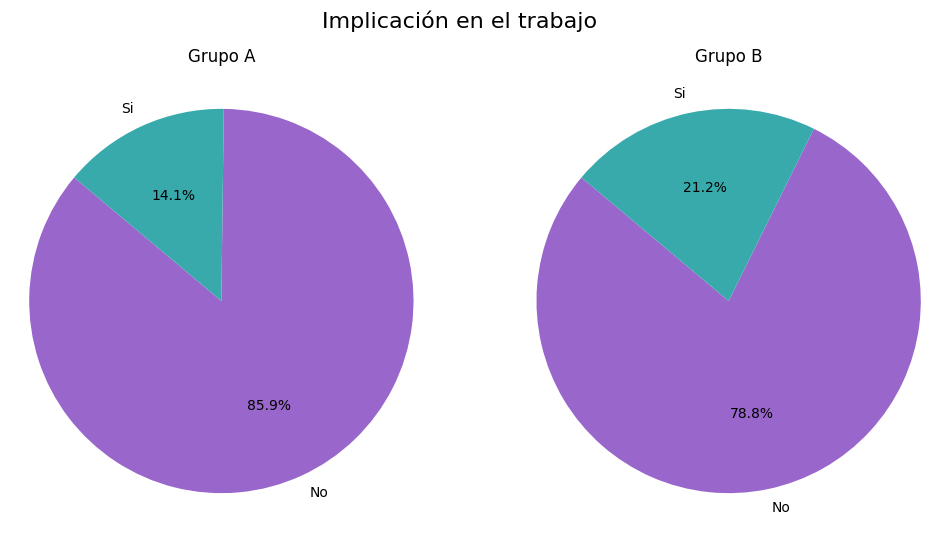

In [54]:
# Datos para los gráficos de quesitos
etiquetas = tabla_contingencia_JI.columns.tolist()

# Obtener los colores de la paleta "mako"
colores_mako = sns.color_palette("mako", len(etiquetas))

# Ajustar manualmente el color violeta para "No" (asumimos que es el último color)
colores_mako = list(colores_mako)  # Convertimos a lista para modificar
colores_mako[0] = (0.6, 0.4, 0.8)  # Ajustar los valores RGB para aclarar el color violeta

# Crear los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico del grupo A
tamaños_A = tabla_contingencia_JI.loc['A']
ax1.pie(tamaños_A, labels=etiquetas, autopct='%1.1f%%', startangle=140, colors=colores_mako)
ax1.axis('equal')  # Para que el gráfico sea un círculo
ax1.set_title('Grupo A')

# Gráfico del grupo B
tamaños_B = tabla_contingencia_JI.loc['B']
ax2.pie(tamaños_B, labels=etiquetas, autopct='%1.1f%%', startangle=140, colors=colores_mako)
ax2.axis('equal')  # Para que el gráfico sea un círculo
ax2.set_title('Grupo B')

# Título principal del gráfico
fig.suptitle('Implicación en el trabajo', fontsize=16)

# Mostrar los gráficos
plt.show()

**Observaciones:**
Observamos que en el grupo A, donde los empleados tienen unos niveles de implicación altos, la tasa de rotación es del 14.1%, mientras que en el grupo B, la tasa de rotación es del 21.20%, lo que significa que el porcentaje de empleados que se han ido en el grupo A es menor al del grupo B, donde los niveles de implicación son más bajos.

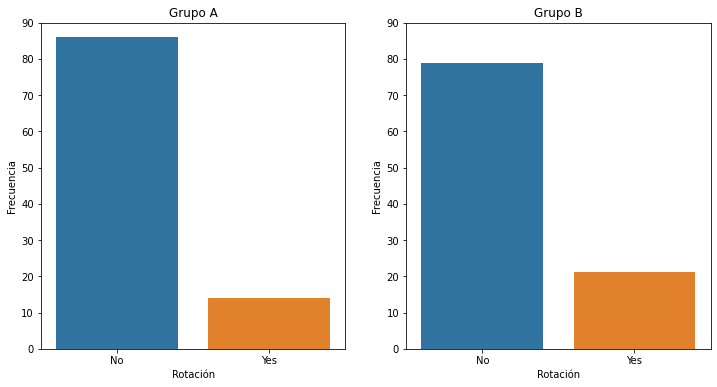

In [ ]:
#Visualizamos los datos de las variables de la tabla de contingencia.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

#Gráfico de barras para grupo A.
sns.barplot(x=tabla_contingencia_JI.columns, y=tabla_contingencia_JI.loc['A'], ax=axes[0])
axes[0].set_title('Grupo A')
axes[0].set_xlabel('Rotación')
axes[0].set_ylabel('Frecuencia')
axes[0].set_ylim(0, 90);

#Gráfico de barras para grupo B.
sns.barplot(x=tabla_contingencia_JI.columns, y=tabla_contingencia_JI.loc['B'], ax=axes[1])
axes[1].set_title('Grupo B')
axes[1].set_xlabel('Rotación')
axes[1].set_ylabel('Frecuencia')
axes[1].set_ylim(0, 90);

In [ ]:
#Antes de realizar la prueba, comprobamos si la distribución de los datos es normal o no.
df_AB_JI['rotacion_grupo_A'] = ((df_AB_JI['Group'] == 'A') & (df_AB_JI['Attrition'] == 'Yes')).astype(int)
df_AB_JI['rotacion_grupo_B'] = ((df_AB_JI['Group'] == 'B') & (df_AB_JI['Attrition'] == 'Yes')).astype(int)

#Hacemos el de Shapiro-Wilk para comprobar la normalidad.
statistic, p_value_a = stats.shapiro(df_AB_JI['rotacion_grupo_A'])
if p_value_a > 0.05:
    print(f"Para la columna 'rotacion_grupo_A', los datos siguen una distribución normal, p-value: {p_value_a:.5f}")
else:
    print(f"Para la columna 'rotacion_grupo_A', los datos no siguen una distribución normal, p-value: {p_value_a:.5f}")

print('...................................................................')

statistic, p_value_b = stats.shapiro(df_AB_JI['rotacion_grupo_B'])
if p_value_b > 0.05:
    print(f"Para la columna 'rotacion_grupo_B', los datos siguen una distribución normal, p-value: {p_value_b:.5f}")
else:
    print(f"Para la columna 'rotacion_grupo_B', los datos no siguen una distribución normal, p-value: {p_value_b:.5f}")

Para la columna 'rotacion_grupo_A', los datos no siguen una distribución normal, p-value: 0.00000
...................................................................
Para la columna 'rotacion_grupo_B', los datos no siguen una distribución normal, p-value: 0.00000


In [ ]:
# Como las distribuciones no son normales, realizamos el test de Mann Whitney.

#Usamos los datos filtrados.
rotacion_grupo_A = df_AB_JI.loc[df_AB_JI['Group'] == 'A', 'rotacion_grupo_A']
rotacion_grupo_B = df_AB_JI.loc[df_AB_JI['Group'] == 'B', 'rotacion_grupo_B']


statistic, p_value = mannwhitneyu(rotacion_grupo_A, rotacion_grupo_B)

print(f'El valor del p_value es de {p_value}')
print('......................................')

#Alfa
alfa=0.05
#Comparamos el valor p con el nivel de significancia.
if p_value > alfa:
    print("No podemos rechazar la hipótesis nula.")
    print("No existe una diferencia significativa entre la rotación del grupo A y del grupo B.")
else:
    print("Rechazamos la hipótesis nula.")
    print("Existe una diferencia significativa entre la rotación del grupo A y del grupo B.")

El valor del p_value es de 0.0031590808498217875
......................................
Rechazamos la hipótesis nula.
Existe una diferencia significativa entre la rotación del grupo A y del grupo B.


## A/B TESTING - GENDER

### Observaciones: No hay una diferencia significativa de rotación entre hombres y mujeres

In [32]:
df_AB_G = pd.read_csv('df_HR_limpio.csv', index_col= None)
df_AB_G.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,DateBirth,RemoteWork
0,51,No,Unknown,684.0,6,3,Unknown,"162,0",1,M,51.0,3,5,Research Director,3,Unknown,19537.0,6462,7,No,13,"3,0",3,0,Unknown,5,3,20,15,15,1972,Yes
1,52,No,Unknown,699.0,1,4,Life Sciences,"259,0",3,M,65.0,2,5,Manager,3,Unknown,19999.0,5678,0,Unknown,14,"3,0",1,1,"34,0",5,3,33,11,9,1971,1
2,42,No,travel_rarely,532.0,4,2,Technical Degree,"319,0",3,M,58.0,3,5,Manager,4,Married,19232.0,4933,1,No,11,"3,0",4,0,"22,0",3,3,22,11,15,1981,1
3,47,No,travel_rarely,359.0,2,4,Medical,Unknown,1,F,82.0,3,4,Research Director,3,Married,17169.0,26703,3,Unknown,19,"3,0",2,2,Unknown,2,3,20,5,6,1976,False
4,48,No,Unknown,117.0,22,3,Medical,"1900,0",4,F,58.0,3,4,Manager,4,Unknown,17174.0,2437,3,No,11,"3,0",2,1,Unknown,3,3,22,4,7,1975,Yes


Creamos dos grupos:

Grupo A (Control): Empleados M

Grupo B (Variante): Empleados F

In [33]:
#Buscamos en la columna 'Gender' los valores únicos para encontrar a los miembros de cada grupo de control.
df_AB_G['Gender'].value_counts()

Gender
M    651
F    429
Name: count, dtype: int64

In [34]:
#Creamos una nueva columna llamada Group en la que agrupamos a los empleados en función de su género.
df_AB_G['Group'] = np.where(df_AB_G['Gender'] == "M", 'A', 'B')
df_AB_G['Group'].value_counts()

Group
A    651
B    429
Name: count, dtype: int64

In [35]:
#Dividimos a los empleados de los grupos A y B en función de si han dejado la empresa o no.
attrition_A_G = df_AB_G[df_AB_G['Group'] == 'A']['Attrition']
attrition_B_G = df_AB_G[df_AB_G['Group'] == 'B']['Attrition']

In [36]:
#Para ver la relación entre estas variables categóricas, creamos una tabla de contingencia.
tabla_contingencia_G = pd.crosstab(df_AB_G['Group'], df_AB_G['Attrition'])
tabla_contingencia_G

Attrition,No,Yes
Group,,
A,537,114
B,366,63


In [37]:
#Como los datos numéricos no nos dan toda la información que necesitamos o no de la manera más evidente, calculamos los porcentajes.
tabla_contingencia_G = pd.crosstab(df_AB_G['Group'], df_AB_G['Attrition'], normalize='index') * 100
tabla_contingencia_G.round(2)

Attrition,No,Yes
Group,,
A,82.49,17.51
B,85.31,14.69


In [38]:
# Renombrar las columnas a Si y No
tabla_contingencia_G.rename(columns={'Yes': 'Si', 'No': 'No'}, inplace=True)

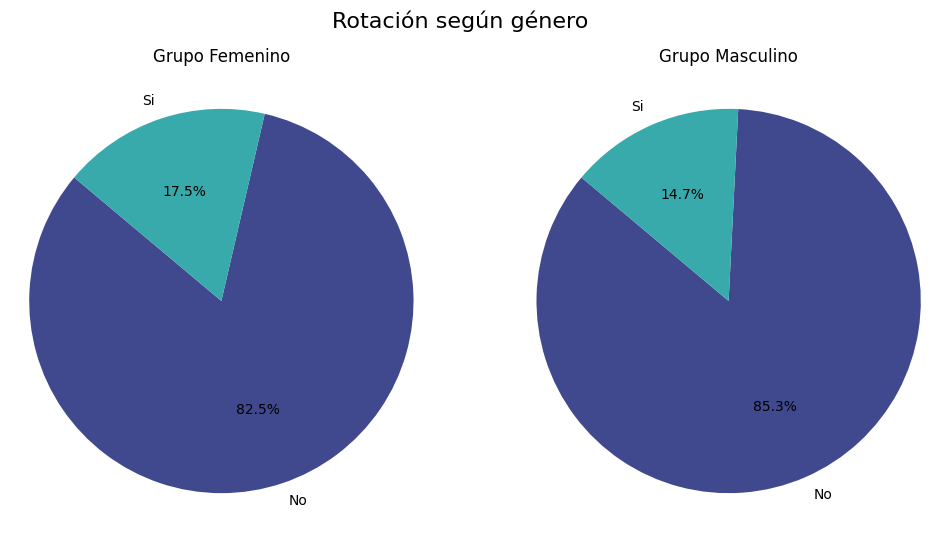

In [39]:
# Datos para los gráficos de quesitos
etiquetas = tabla_contingencia_G.columns.tolist()

# Obtener los colores de la paleta "mako"
colores_mako = sns.color_palette("mako", len(etiquetas))

# Crear los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico del grupo A
tamaños_A = tabla_contingencia_G.loc['A']
ax1.pie(tamaños_A, labels=etiquetas, autopct='%1.1f%%', startangle=140,  colors=colores_mako)
ax1.axis('equal')  # Para que el gráfico sea un círculo
ax1.set_title('Grupo Femenino')

# Gráfico del grupo B
tamaños_B = tabla_contingencia_G.loc['B']
ax2.pie(tamaños_B, labels=etiquetas, autopct='%1.1f%%', startangle=140,  colors=colores_mako)
ax2.axis('equal')  # Para que el gráfico sea un círculo
ax2.set_title('Grupo Masculino')

# Título principal del gráfico
fig.suptitle('Rotación según género', fontsize=16)

# Mostrar los gráficos
plt.show()

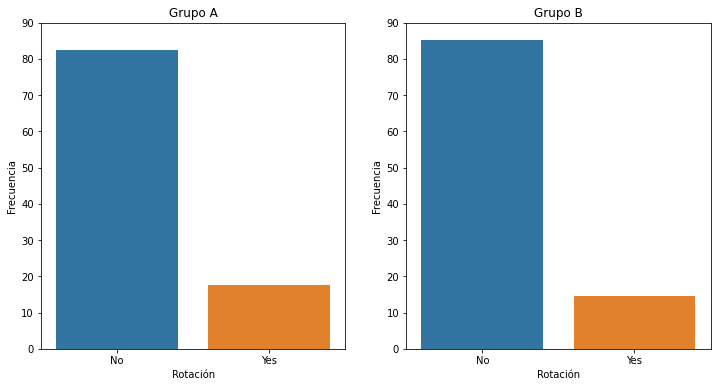

In [ ]:
#Visualizamos los datos de las variables de la tabla de contingencia.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

#Gráfico de barras para grupo A.
sns.barplot(x=tabla_contingencia_G.columns, y=tabla_contingencia_G.loc['A'], ax=axes[0])
axes[0].set_title('Grupo A')
axes[0].set_xlabel('Rotación')
axes[0].set_ylabel('Frecuencia')
axes[0].set_ylim(0, 90);

#Gráfico de barras para grupo B.
sns.barplot(x=tabla_contingencia_G.columns, y=tabla_contingencia_G.loc['B'], ax=axes[1])
axes[1].set_title('Grupo B')
axes[1].set_xlabel('Rotación')
axes[1].set_ylabel('Frecuencia')
axes[1].set_ylim(0, 90);

In [ ]:
#Antes de realizar la prueba, comprobamos si la distribución de los datos es normal o no.
df_AB_G['rotacion_grupo_A'] = ((df_AB_G['Group'] == 'A') & (df_AB_G['Attrition'] == 'Yes')).astype(int)
df_AB_G['rotacion_grupo_B'] = ((df_AB_G['Group'] == 'B') & (df_AB_G['Attrition'] == 'Yes')).astype(int)

#Hacemos el de Shapiro-Wilk para comprobar la normalidad.
statistic, p_value_a = stats.shapiro(df_AB_G['rotacion_grupo_A'])
if p_value_a > 0.05:
    print(f"Para la columna 'rotacion_grupo_A', los datos siguen una distribución normal, p-value: {p_value_a:.5f}")
else:
    print(f"Para la columna 'rotacion_grupo_A', los datos no siguen una distribución normal, p-value: {p_value_a:.5f}")

print('...................................................................')

statistic, p_value_b = stats.shapiro(df_AB_G['rotacion_grupo_B'])
if p_value_b > 0.05:
    print(f"Para la columna 'rotacion_grupo_B', los datos siguen una distribución normal, p-value: {p_value_b:.5f}")
else:
    print(f"Para la columna 'rotacion_grupo_B', los datos no siguen una distribución normal, p-value: {p_value_b:.5f}")

Para la columna 'rotacion_grupo_A', los datos no siguen una distribución normal, p-value: 0.00000
...................................................................
Para la columna 'rotacion_grupo_B', los datos no siguen una distribución normal, p-value: 0.00000


In [ ]:
# Como las distribuciones no son normales, realizamos el test de Mann Whitney.

#Usamos los datos filtrados.
rotacion_grupo_A = df_AB_G.loc[df_AB_G['Group'] == 'A', 'rotacion_grupo_A']
rotacion_grupo_B = df_AB_G.loc[df_AB_G['Group'] == 'B', 'rotacion_grupo_B']


statistic, p_value = mannwhitneyu(rotacion_grupo_A, rotacion_grupo_B)

print(f'El valor del p_value es de {p_value}')
print('......................................')

#Alfa
alfa=0.05
#Comparamos el valor p con el nivel de significancia.
if p_value > alfa:
    print("No podemos rechazar la hipótesis nula.")
    print("No existe una diferencia significativa entre la rotación del grupo A y del grupo B.")
else:
    print("Rechazamos la hipótesis nula.")
    print("Existe una diferencia significativa entre la rotación del grupo A y del grupo B.")

El valor del p_value es de 0.21981878142278932
......................................
No podemos rechazar la hipótesis nula.
No existe una diferencia significativa entre la rotación del grupo A y del grupo B.


## A/B TESTING - STOCK OPTION LEVEL

### Observaciones: Hay una mayor rotación de los empleados que NO tienen opciones de compra de acciones de la empresa.

In [40]:
df_AB_SOL = pd.read_csv('df_HR_limpio.csv', index_col= None)
df_AB_SOL.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,DateBirth,RemoteWork
0,51,No,Unknown,684.0,6,3,Unknown,"162,0",1,M,51.0,3,5,Research Director,3,Unknown,19537.0,6462,7,No,13,"3,0",3,0,Unknown,5,3,20,15,15,1972,Yes
1,52,No,Unknown,699.0,1,4,Life Sciences,"259,0",3,M,65.0,2,5,Manager,3,Unknown,19999.0,5678,0,Unknown,14,"3,0",1,1,"34,0",5,3,33,11,9,1971,1
2,42,No,travel_rarely,532.0,4,2,Technical Degree,"319,0",3,M,58.0,3,5,Manager,4,Married,19232.0,4933,1,No,11,"3,0",4,0,"22,0",3,3,22,11,15,1981,1
3,47,No,travel_rarely,359.0,2,4,Medical,Unknown,1,F,82.0,3,4,Research Director,3,Married,17169.0,26703,3,Unknown,19,"3,0",2,2,Unknown,2,3,20,5,6,1976,False
4,48,No,Unknown,117.0,22,3,Medical,"1900,0",4,F,58.0,3,4,Manager,4,Unknown,17174.0,2437,3,No,11,"3,0",2,1,Unknown,3,3,22,4,7,1975,Yes


Creamos dos grupos:

Grupo A (Control): Empleados con un nivel de opción de compra de acciones igual o superior a 1 en una escala de 0 a 3.

Grupo B (Variante): Empleados con un nivel de opción de compra de acciones inferior a 1 en la misma escala.

In [41]:
#Buscamos en la columna 'StockOptionLevel' los valores únicos para encontrar a los miembros de cada grupo de control.
df_AB_G['StockOptionLevel'].value_counts()

StockOptionLevel
0    460
1    442
2    119
3     59
Name: count, dtype: int64

In [42]:
#Creamos una nueva columna llamada Group en la que agrupamos a los empleados en función de sus niveles de opción de compra de acciones.
df_AB_SOL['Group'] = np.where(df_AB_SOL['StockOptionLevel'] >= 1, 'A', 'B')
df_AB_SOL['Group'].value_counts()

Group
A    620
B    460
Name: count, dtype: int64

In [43]:
#Dividimos a los empleados de los grupos A y B en función de si han dejado la empresa o no.
attrition_A_SOL = df_AB_SOL[df_AB_SOL['Group'] == 'A']['Attrition']
attrition_B_SOL = df_AB_SOL[df_AB_SOL['Group'] == 'B']['Attrition']

In [44]:
#Calculamos los porcentajes.
tabla_contingencia_SOL = pd.crosstab(df_AB_SOL['Group'], df_AB_SOL['Attrition'], normalize='index') * 100
tabla_contingencia_SOL.round(2)

Attrition,No,Yes
Group,,
A,90.16,9.84
B,74.78,25.22


In [45]:
# Renombrar las columnas a Si y No
tabla_contingencia_SOL.rename(columns={'Yes': 'Si', 'No': 'No'}, inplace=True)

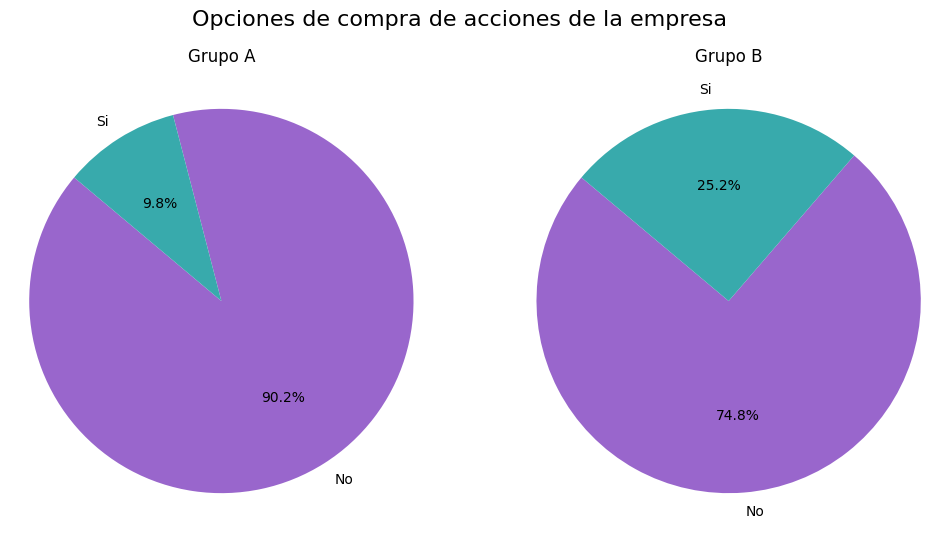

In [55]:

# Datos para los gráficos de quesitos
etiquetas = tabla_contingencia_SOL.columns.tolist()

# Obtener los colores de la paleta "mako"
colores_mako = sns.color_palette("mako", len(etiquetas))

# Ajustar manualmente el color violeta para "No" (asumimos que es el último color)
colores_mako = list(colores_mako)  # Convertimos a lista para modificar
colores_mako[0] = (0.6, 0.4, 0.8)  # Ajustar los valores RGB para aclarar el color violeta

# Crear los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico del grupo A
tamaños_A = tabla_contingencia_SOL.loc['A']
ax1.pie(tamaños_A, labels=etiquetas, autopct='%1.1f%%', startangle=140, colors=colores_mako)
ax1.axis('equal')  # Para que el gráfico sea un círculo
ax1.set_title('Grupo A')

# Gráfico del grupo B
tamaños_B = tabla_contingencia_SOL.loc['B']
ax2.pie(tamaños_B, labels=etiquetas, autopct='%1.1f%%', startangle=140, colors=colores_mako)
ax2.axis('equal')  # Para que el gráfico sea un círculo
ax2.set_title('Grupo B')

# Título principal del gráfico
fig.suptitle('Opciones de compra de acciones de la empresa', fontsize=16)

# Mostrar los gráficos
plt.show()

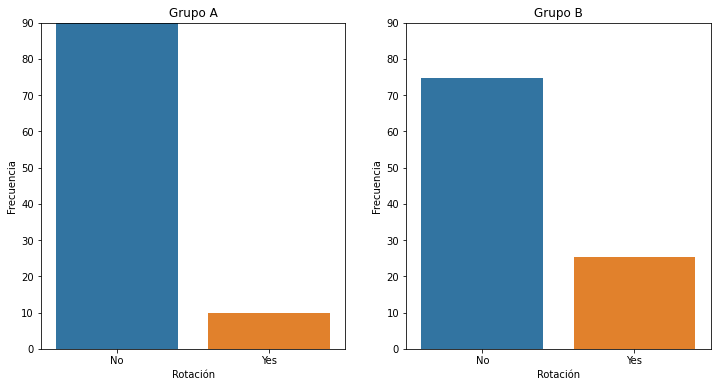

In [ ]:
#Visualizamos los datos de las variables de la tabla de contingencia.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

#Gráfico de barras para grupo A.
sns.barplot(x=tabla_contingencia_SOL.columns, y=tabla_contingencia_SOL.loc['A'], ax=axes[0])
axes[0].set_title('Grupo A')
axes[0].set_xlabel('Rotación')
axes[0].set_ylabel('Frecuencia')
axes[0].set_ylim(0, 90);

#Gráfico de barras para grupo B.
sns.barplot(x=tabla_contingencia_SOL.columns, y=tabla_contingencia_SOL.loc['B'], ax=axes[1])
axes[1].set_title('Grupo B')
axes[1].set_xlabel('Rotación')
axes[1].set_ylabel('Frecuencia')
axes[1].set_ylim(0, 90);

In [ ]:
#Antes de realizar la prueba, comprobamos si la distribución de los datos es normal o no.
df_AB_SOL['rotacion_grupo_A'] = ((df_AB_SOL['Group'] == 'A') & (df_AB_SOL['Attrition'] == 'Yes')).astype(int)
df_AB_SOL['rotacion_grupo_B'] = ((df_AB_SOL['Group'] == 'B') & (df_AB_SOL['Attrition'] == 'Yes')).astype(int)

#Hacemos el de Shapiro-Wilk para comprobar la normalidad.
statistic, p_value_a = stats.shapiro(df_AB_SOL['rotacion_grupo_A'])
if p_value_a > 0.05:
    print(f"Para la columna 'rotacion_grupo_A', los datos siguen una distribución normal, p-value: {p_value_a:.5f}")
else:
    print(f"Para la columna 'rotacion_grupo_A', los datos no siguen una distribución normal, p-value: {p_value_a:.5f}")

print('...................................................................')

statistic, p_value_b = stats.shapiro(df_AB_SOL['rotacion_grupo_B'])
if p_value_b > 0.05:
    print(f"Para la columna 'rotacion_grupo_B', los datos siguen una distribución normal, p-value: {p_value_b:.5f}")
else:
    print(f"Para la columna 'rotacion_grupo_B', los datos no siguen una distribución normal, p-value: {p_value_b:.5f}")

Para la columna 'rotacion_grupo_A', los datos no siguen una distribución normal, p-value: 0.00000
...................................................................
Para la columna 'rotacion_grupo_B', los datos no siguen una distribución normal, p-value: 0.00000


In [ ]:
# Como las distribuciones no son normales, realizamos el test de Mann Whitney.

#Usamos los datos filtrados.
rotacion_grupo_A = df_AB_SOL.loc[df_AB_SOL['Group'] == 'A', 'rotacion_grupo_A']
rotacion_grupo_B = df_AB_SOL.loc[df_AB_SOL['Group'] == 'B', 'rotacion_grupo_B']


statistic, p_value = mannwhitneyu(rotacion_grupo_A, rotacion_grupo_B)

print(f'El valor del p_value es de {p_value}')
print('......................................')

#Alfa
alfa=0.05
#Comparamos el valor p con el nivel de significancia.
if p_value > alfa:
    print("No podemos rechazar la hipótesis nula.")
    print("No existe una diferencia significativa entre la rotación del grupo A y del grupo B.")
else:
    print("Rechazamos la hipótesis nula.")
    print("Existe una diferencia significativa entre la rotación del grupo A y del grupo B.")

El valor del p_value es de 1.500718905852675e-11
......................................
Rechazamos la hipótesis nula.
Existe una diferencia significativa entre la rotación del grupo A y del grupo B.


## A/B TESTING - WORK/LIFE BALANCE

### Observaciones: La conciliación no parece ser un factor determinante en la rotación de empleados

In [47]:
df_AB_WLB = pd.read_csv('df_HR_limpio.csv', index_col= None)
df_AB_WLB.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,DateBirth,RemoteWork
0,51,No,Unknown,684.0,6,3,Unknown,"162,0",1,M,51.0,3,5,Research Director,3,Unknown,19537.0,6462,7,No,13,"3,0",3,0,Unknown,5,3,20,15,15,1972,Yes
1,52,No,Unknown,699.0,1,4,Life Sciences,"259,0",3,M,65.0,2,5,Manager,3,Unknown,19999.0,5678,0,Unknown,14,"3,0",1,1,"34,0",5,3,33,11,9,1971,1
2,42,No,travel_rarely,532.0,4,2,Technical Degree,"319,0",3,M,58.0,3,5,Manager,4,Married,19232.0,4933,1,No,11,"3,0",4,0,"22,0",3,3,22,11,15,1981,1
3,47,No,travel_rarely,359.0,2,4,Medical,Unknown,1,F,82.0,3,4,Research Director,3,Married,17169.0,26703,3,Unknown,19,"3,0",2,2,Unknown,2,3,20,5,6,1976,False
4,48,No,Unknown,117.0,22,3,Medical,"1900,0",4,F,58.0,3,4,Manager,4,Unknown,17174.0,2437,3,No,11,"3,0",2,1,Unknown,3,3,22,4,7,1975,Yes


Creamos dos grupos:

Grupo A (Control): Empleados con un nivel de conciliación igual o superior a 3 en una escala de 1 a 4.

Grupo B (Variante): Empleados con un nivel de conciliación inferior a 3 en la misma escala.

In [48]:
#Buscamos en la columna 'WorkLifeBalance' los valores únicos para encontrar a los miembros de cada grupo de control.
df_AB_WLB['WorkLifeBalance'].value_counts()

WorkLifeBalance
3    684
2    238
4    106
1     52
Name: count, dtype: int64

In [49]:
#Creamos una nueva columna llamada Group en la que agrupamos a los empleados en función de sus niveles de conciliación.
df_AB_WLB['Group'] = np.where(df_AB_WLB['WorkLifeBalance'] >= 3, 'A', 'B')
df_AB_WLB['Group'].value_counts()

Group
A    790
B    290
Name: count, dtype: int64

In [50]:
#Dividimos a los empleados de los grupos A y B en función de si han dejado la empresa o no.
attrition_A_WLB = df_AB_WLB[df_AB_WLB['Group'] == 'A']['Attrition']
attrition_B_WLB = df_AB_WLB[df_AB_WLB['Group'] == 'B']['Attrition']

In [51]:
#Calculamos los porcentajes.
tabla_contingencia_WLB = pd.crosstab(df_AB_WLB['Group'], df_AB_WLB['Attrition'], normalize='index') * 100
tabla_contingencia_WLB.round(2)

Attrition,No,Yes
Group,,
A,84.68,15.32
B,80.69,19.31


In [52]:
# Renombrar las columnas a Si y No
tabla_contingencia_WLB.rename(columns={'Yes': 'Si', 'No': 'No'}, inplace=True)

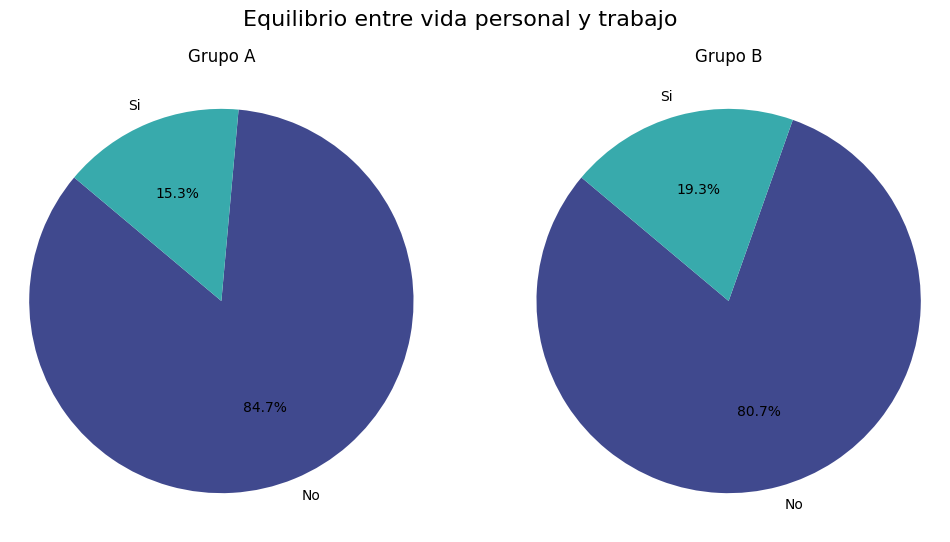

In [53]:
# Datos para los gráficos de quesitos
etiquetas = tabla_contingencia_WLB.columns.tolist()

# Obtener los colores de la paleta "mako"
colores_mako = sns.color_palette("mako", len(etiquetas))

# Crear los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico del grupo A
tamaños_A = tabla_contingencia_WLB.loc['A']
ax1.pie(tamaños_A, labels=etiquetas, autopct='%1.1f%%', startangle=140, colors=colores_mako)
ax1.axis('equal')  # Para que el gráfico sea un círculo
ax1.set_title('Grupo A')

# Gráfico del grupo B
tamaños_B = tabla_contingencia_WLB.loc['B']
ax2.pie(tamaños_B, labels=etiquetas, autopct='%1.1f%%', startangle=140, colors=colores_mako)
ax2.axis('equal')  # Para que el gráfico sea un círculo
ax2.set_title('Grupo B')

# Título principal del gráfico
fig.suptitle('Equilibrio entre vida personal y trabajo', fontsize=16)

# Mostrar los gráficos
plt.show()

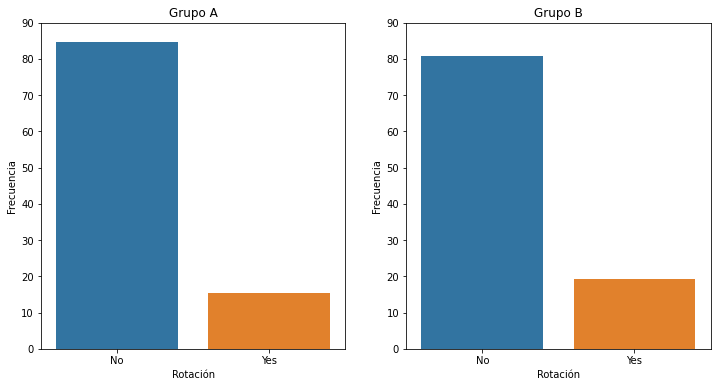

In [ ]:
#Visualizamos los datos de las variables de la tabla de contingencia.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

#Gráfico de barras para grupo A.
sns.barplot(x=tabla_contingencia_WLB.columns, y=tabla_contingencia_WLB.loc['A'], ax=axes[0])
axes[0].set_title('Grupo A')
axes[0].set_xlabel('Rotación')
axes[0].set_ylabel('Frecuencia')
axes[0].set_ylim(0, 90);

#Gráfico de barras para grupo B.
sns.barplot(x=tabla_contingencia_WLB.columns, y=tabla_contingencia_WLB.loc['B'], ax=axes[1])
axes[1].set_title('Grupo B')
axes[1].set_xlabel('Rotación')
axes[1].set_ylabel('Frecuencia')
axes[1].set_ylim(0, 90);

In [ ]:
#Antes de realizar la prueba, comprobamos si la distribución de los datos es normal o no.
df_AB_WLB['rotacion_grupo_A'] = ((df_AB_WLB['Group'] == 'A') & (df_AB_WLB['Attrition'] == 'Yes')).astype(int)
df_AB_WLB['rotacion_grupo_B'] = ((df_AB_WLB['Group'] == 'B') & (df_AB_WLB['Attrition'] == 'Yes')).astype(int)

#Hacemos el de Shapiro-Wilk para comprobar la normalidad.
statistic, p_value_a = stats.shapiro(df_AB_WLB['rotacion_grupo_A'])
if p_value_a > 0.05:
    print(f"Para la columna 'rotacion_grupo_A', los datos siguen una distribución normal, p-value: {p_value_a:.5f}")
else:
    print(f"Para la columna 'rotacion_grupo_A', los datos no siguen una distribución normal, p-value: {p_value_a:.5f}")

print('...................................................................')

statistic, p_value_b = stats.shapiro(df_AB_WLB['rotacion_grupo_B'])
if p_value_b > 0.05:
    print(f"Para la columna 'rotacion_grupo_B', los datos siguen una distribución normal, p-value: {p_value_b:.5f}")
else:
    print(f"Para la columna 'rotacion_grupo_B', los datos no siguen una distribución normal, p-value: {p_value_b:.5f}")

Para la columna 'rotacion_grupo_A', los datos no siguen una distribución normal, p-value: 0.00000
...................................................................
Para la columna 'rotacion_grupo_B', los datos no siguen una distribución normal, p-value: 0.00000


In [ ]:
# Como las distribuciones no son normales, realizamos el test de Mann Whitney.

#Usamos los datos filtrados.
rotacion_grupo_A = df_AB_WLB.loc[df_AB_WLB['Group'] == 'A', 'rotacion_grupo_A']
rotacion_grupo_B = df_AB_WLB.loc[df_AB_WLB['Group'] == 'B', 'rotacion_grupo_B']


statistic, p_value = mannwhitneyu(rotacion_grupo_A, rotacion_grupo_B)

print(f'El valor del p_value es de {p_value}')
print('......................................')

#Alfa
alfa=0.05
#Comparamos el valor p con el nivel de significancia.
if p_value > alfa:
    print("No podemos rechazar la hipótesis nula.")
    print("No existe una diferencia significativa entre la rotación del grupo A y del grupo B.")
else:
    print("Rechazamos la hipótesis nula.")
    print("Existe una diferencia significativa entre la rotación del grupo A y del grupo B.")

El valor del p_value es de 0.1162960130235943
......................................
No podemos rechazar la hipótesis nula.
No existe una diferencia significativa entre la rotación del grupo A y del grupo B.


In [ ]:
# FUNCIÓN DE CONTEO DE FRECUENCIAS DE CADA COLUMNA

# EJECUTAR Y ABRIR EN TEXT EDITOR PARA VISUALIZAR LOS RESULTADOS EN UN ARCHIVO INDEPENDIENTE

def count_frequencies(df):
    # Creamos un diccionario para almacenar los resultados
    frequency_counts = {}
    
    # Recorremos todas las columnas del DataFrame
    for column in df_HR.columns:
        # Aplicar .value_counts() a cada columna y almacenarlo en el diccionario
        frequency_counts[column] = df[column].value_counts()
    
    return frequency_counts

# Llamamos a la función y obtenemos el conteo de frecuencia de cada columna
frequency_counts = count_frequencies(df_HR)

# Mostramos los resultados
for column, counts in frequency_counts.items():
    print(f"Conteo de frecuencias para la columna {column}:")
    print(counts)
    print()  # Línea en blanco para separar los resultados

Conteo de frecuencias para la columna Age:
34    62
35    55
31    50
30    48
36    47
32    46
29    45
33    43
38    42
27    40
42    40
28    34
37    33
45    33
40    31
41    31
26    31
44    28
39    27
43    27
46    25
50    22
49    21
25    18
47    17
24    16
48    16
53    15
55    15
54    14
23    13
52    12
51    11
56    11
58    11
22     9
59     8
21     8
20     7
19     7
18     6
60     3
57     2
Name: Age, dtype: int64

Conteo de frecuencias para la columna Attrition:
No     903
Yes    177
Name: Attrition, dtype: int64

Conteo de frecuencias para la columna BusinessTravel:
Unknown              534
travel_rarely        376
travel_frequently    110
non-travel            60
Name: BusinessTravel, dtype: int64

Conteo de frecuencias para la columna DailyRate:
803.129648     85
329.000000      5
575.000000      4
921.000000      4
427.000000      4
               ..
1023.000000     1
300.000000      1
1131.000000     1
333.000000      1
1404.000000     1
Name: 